# **Heart Disease Prediction ML Project**

## About Dataset (Meta Data)

### Context

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content

### Column Descriptions:
| Column       | Meaning (Simple)           | Values & Explanation                                                                                            |
| ------------ | -------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **id**       | Patient unique number      | Any number, identity only                                                                                       |
| **age**      | Patient age                | Number in years (e.g., 50)                                                                                      |
| **sex**      | Gender                     | Male / Female                                                                                                   |
| **dataset**  | Data source                | Cleveland, Hungary, VA Long Beach, Switzerland                                                                  |
| **cp**       | Chest pain type            | typical angina → classic pain, atypical → unusual pain, non-anginal → not heart-related, asymptomatic → no pain |
| **trestbps** | Resting blood pressure     | Number in mmHg (120 normal, 140+ high)                                                                          |
| **chol**     | Cholesterol                | Number in mg/dl (200 normal, 240+ high)                                                                         |
| **fbs**      | Fasting blood sugar        | True → >120 mg/dl, False → normal                                                                               |
| **restecg**  | ECG results                | normal → healthy, lv hypertrophy → left ventricle enlarged, st-t abnormality → abnormal rhythm                  |
| **thalch**   | Max heart rate             | Number (high → fit, low → possible heart problem)                                                               |
| **exang**    | Exercise-induced angina    | True → pain with exercise, False → no pain                                                                      |
| **oldpeak**  | Heart stress from exercise | Number (0 normal, higher → more stress)                                                                         |
| **slope**    | ST segment slope           | upsloping → healthy, flat → moderate risk, downsloping → high risk                                              |
| **ca**       | Major vessels colored      | 0 → none blocked, 1-3 → blockage severity                                                                       |
| **thal**     | Thallium test result       | normal → healthy, fixed defect → permanent damage, reversable defect → temporary problem                        |
| **num**      | Heart disease              | 0 - no disease, 1 - mild heart disease, 2 - moderate heart disease, 3 - severe heart disease,                   |
|              |                            | 4 - critical heart disease                                                                                      |


## Acknowledgements

### Creators:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. Web Link
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link

### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.



# Aims and Objectives 

we will fill this after EDA

### Import Laibraies

In [558]:
# TO handle data
import pandas as pd 
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# To preprocess data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 
from sklearn.impute import SimpleImputer, KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For classification task import model for classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

# For classification task import matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [559]:
# read the data od heart_disease_uci.csv which is in 00_Data folder
df = pd.read_csv("../00_Data/heart_disease_uci.csv")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [560]:
df.shape

(920, 16)

Observation: 

Here Rows: 920, Columns: 16

## EDA Explore each columns



In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [562]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [563]:
df.isnull().sum().sort_values(ascending=False)/ len(df) * 100

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [564]:
df.duplicated().sum()

0

In [565]:
print(df.sex.value_counts())
print("-----------------------------------------------")
print(df.dataset.value_counts())
print("-----------------------------------------------")
print(df.cp.value_counts())
print("-----------------------------------------------")
print(df.fbs.value_counts())



sex
Male      726
Female    194
Name: count, dtype: int64
-----------------------------------------------
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
-----------------------------------------------
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
-----------------------------------------------
fbs
False    692
True     138
Name: count, dtype: int64


In [566]:
print(df.restecg.value_counts())
print("-----------------------------------------------")
print(df.exang.value_counts())
print("-----------------------------------------------")
print(df.slope.value_counts())
print("-----------------------------------------------")
print(df.thal.value_counts())


restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
-----------------------------------------------
exang
False    528
True     337
Name: count, dtype: int64
-----------------------------------------------
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64
-----------------------------------------------
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


In [567]:
print(df.num.value_counts())

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


Observation:
1. For 'sex' column: in between male and female, Male cause maximum cancer having 726.
2. For 'dataset' column: maximum date is from cleveland 304 and minimum 123 is from Switzerland.
3. for 'cp' column: most patient are asymptomatic. typical angina is rare.
4. for 'fbs' column: most patient do not have high fasting blood sugar.
5. for 'restecg' column: Normal ECG is the most common. LV hypertrophy and ST-T abnormalities are less common.
6. for 'exang' column: More patients do not experience angina during exercise, but the number with angina is still significant.
7. for 'slop' column: Flat slope dominates. Downsloping is least common.
8. for 'thal' column: Normal and reversible defect cases are almost equal, fixed defect is lowest.

In [568]:
print("mean: ", df.age.mean())
print("median:",df.age.median())
print("mode:",df.age.mode()[0])

mean:  53.51086956521739
median: 54.0
mode: 54


<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution of Patients')

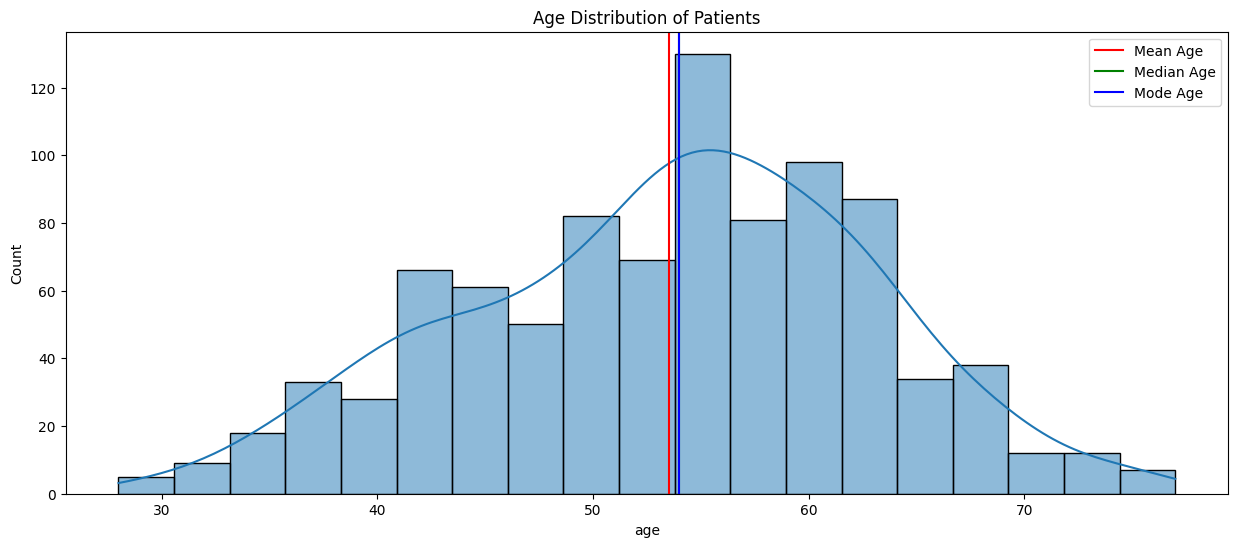

In [569]:
# plot age 
plt.figure(figsize=(15,6))
sns.histplot(df.age, kde = True)
plt.axvline(df.age.mean(), color='red', linestyle='-', label='Mean Age')
plt.axvline(df.age.median(), color='green', linestyle='-', label='Median Age')
plt.axvline(df.age.mode()[0], color='blue', linestyle='-', label='Mode Age')
plt.legend()
plt.title('Age Distribution of Patients')
plt.show()

Obseravtion: 

1. For 'age' column: the minimum value is 28 and the maximum value is 77 which means the strating age of heart disease is 28.In between 28 to 77. avg age range is 53 to 55


#### Lets explore the sex based distribution of the dataset for age columns

In [570]:

fig = px.histogram(df, x = 'age', color= 'sex')
fig.show()

In [571]:
df.groupby('sex')['age'].value_counts().unstack()

age,28,29,30,31,32,33,34,35,36,37,...,68,69,70,71,72,73,74,75,76,77
sex,,,,,,,,,,,,,,,,,,,,,
Female,NaN,NaN,1.0,1.0,1.0,1.0,2.0,3.0,NaN,4.0,...,1.0,1.0,NaN,3.0,NaN,1.0,1.0,NaN,1.0,NaN
Male,1.0,3.0,NaN,1.0,4.0,1.0,5.0,8.0,6.0,7.0,...,9.0,12.0,7.0,2.0,4.0,NaN,6.0,3.0,1.0,2.0


In [572]:
# To find the percentage distribution of male and female

round(df.sex.value_counts()/ len(df) * 100, 2)

sex
Male      78.91
Female    21.09
Name: count, dtype: float64

Obsevation: 
1. Most of the male and female get heart disease at the age of  54 - 55 age.
2. The percentage of male in the dataset is 78.91%.
3. The percentage of female in the dataset is 21.08%.


### Let's data with dataset column

In [573]:
df.dataset.unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [574]:
df.dataset.value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [575]:
df.groupby('dataset')['sex'].value_counts().unstack()

sex,Female,Male
dataset,,
Cleveland,97,207
Hungary,81,212
Switzerland,10,113
VA Long Beach,6,194


<Axes: xlabel='dataset', ylabel='count'>

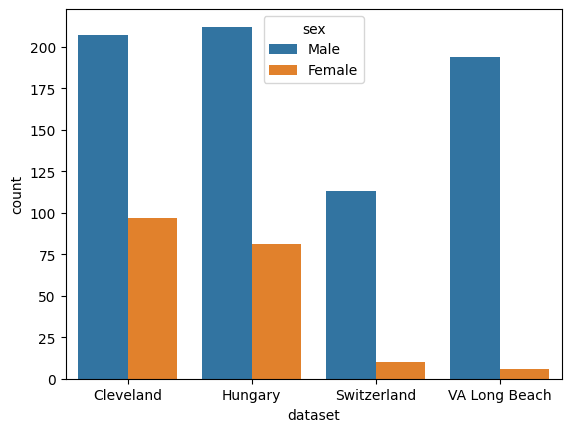

In [576]:
sns.countplot(x='dataset', data=df, hue='sex')

### Lets compare with the age column 

In [577]:
fig = px.histogram(df, x = 'age', color= 'dataset')
fig.show()

In [578]:
# print the mean, median, mode of the dataset columns

print(df.groupby('dataset')['age'].mean() )
print("------------------------------------------------")
print(df.groupby('dataset')['age'].median())
print("------------------------------------------------")
print(df.groupby('dataset')['age'].apply(lambda x: x.mode()[0]))


dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
------------------------------------------------
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
------------------------------------------------
dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


Observations:

1. Cleveland has the highest counts: 207 males and 97 females.

2. VA Long Beach has the lowest number of females (6), while Switzerland has the lowest number of males (194).

3. VA Long Beach has the oldest patients, with a mean age ~59 and median age 60.

4. Hungary has the youngest patients, with a mean age ~48 and median age 49.

5. Cleveland and Switzerland fall in the mid-age range, mostly in the mid-50s.

6. Switzerland and VA Long Beach show the highest maximum ages (61–62).

7. Hungary has the lowest maximum age (54), indicating a younger patient population.

8. Across all datasets, most heart-disease patients are above age 50.

### Lets explore cp(chest pain) column

In [579]:
df.cp.unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

• typical angina → classic heart-attack–type chest pain

• atypical angina → chest pain that is not typical of a heart attack

• non-anginal → chest pain that is not related to the heart

• asymptomatic → no chest pain, but disease can still be present

In [580]:
df.cp.value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [581]:
df.groupby('sex')['cp'].value_counts().unstack()

cp,asymptomatic,atypical angina,non-anginal,typical angina
sex,,,,
Female,70,61,53,10
Male,426,113,151,36


In [582]:
df.groupby('cp')['age'].value_counts().unstack()

age,28,29,30,31,32,33,34,35,36,37,...,68,69,70,71,72,73,74,75,76,77
cp,,,,,,,,,,,,,,,,,,,,,
asymptomatic,NaN,NaN,NaN,1.0,1.0,1.0,1.0,5.0,1.0,4.0,...,4.0,8.0,5.0,2.0,2.0,NaN,2.0,3.0,NaN,2.0
atypical angina,1.0,3.0,NaN,1.0,3.0,NaN,4.0,4.0,2.0,2.0,...,NaN,NaN,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN
non-anginal,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,5.0,...,5.0,3.0,1.0,2.0,2.0,1.0,2.0,NaN,2.0,NaN
typical angina,NaN,NaN,1.0,NaN,1.0,NaN,2.0,1.0,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [583]:
fig = px.histogram(df, x='cp', color='sex', barmode='group')
fig.show()

In [584]:
fig = px.histogram(df, x='age', color='cp')
fig.show()

In [585]:
fig = px.histogram(df, x='age', color='cp', barmode='group')
fig.show()

In [586]:
fig = px.histogram(df, x='cp', color='dataset', barmode='group')
fig.show()

Observation: For the 'cp' column

1. 496 patients are asymptomatic, meaning many patients have heart disease without showing any chest-pain symptoms.

2. Among asymptomatic patients, 426 are male and 70 are female.

3. The minimum number of patients in the “typical angina” category is 46, with 10 females and 36 males.

4. The average age of asymptomatic patients is 56–57 years.
The average age for atypical angina and non-anginal pain is 54–55 years,
while for typical angina, it is 62–63 years.

6. Based on the dataset distribution:

   * 144 asymptomatic patients are from Cleveland

   * 123 asymptomatic patients are from Hungary

   * 131 asymptomatic patients are from VA Long Beach

   * 98 asymptomatic patients are from Switzerland

### Let's Explore trestbps 

<Axes: xlabel='trestbps', ylabel='Count'>

Text(0.5, 1.0, 'Resting Blood Pressure Distribution')

Text(0.5, 0, 'Resting Blood Pressure (trestbps)')

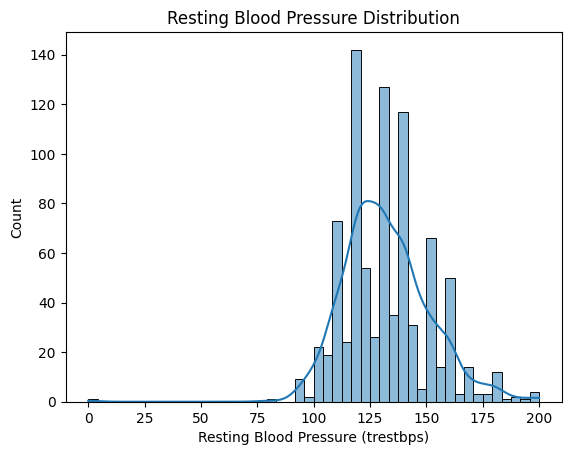

In [587]:
sns.histplot(data=df, x='trestbps', kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.show()

In [588]:
# dealing with missing values 

print(" The missing value trestbps is: ", df['trestbps'].isnull().sum()/ len(df) * 100)

 The missing value trestbps is:  6.41304347826087


In [589]:
# # inputing missing values with Iterative Imputer
# imputer = IterativeImputer(max_iter=10, random_state=42)
# df['trestbps'] = imputer.fit_transform(df[['trestbps']])
# print("the missing value in trestbps:", df['trestbps'].isnull().sum())


In [590]:
# lets impute other columns missing values
(df.isnull().sum()/ len(df) * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [592]:
# # Imputing numberic missing value
# imputer_2 = IterativeImputer(max_iter=10, random_state=42)
# df[['chol', 'thalch', 'oldpeak']] = imputer_2.fit_transform(df[['chol', 'thalch', 'oldpeak']])


In [593]:
df.isnull().sum().sort_values(ascending=False)/ len(df) * 100

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [594]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [595]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [596]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    #print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [597]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [598]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.120693641618498 

R2 = 0.08768684376347091 

Missing Values chol : 3.26%
MAE = 44.98438202247191 

R2 = 0.6771494909872233 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.76 accuracy

Missing Values thalch : 5.98%
MAE = 16.77797687861272 

R2 = 0.31623318069239226 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5591337209302325 

R2 = 0.4149134743002777 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.92 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



In [599]:
df.isnull().sum().sort_values(ascending=False)/ len(df) * 100

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

Observation :

### Steps the code follows

1. **Split data** → separate rows with and without missing values.
2. **Prepare features** → drop the target column and keep the rest as inputs.
3. **Encode categories** → convert string columns into numbers so the model can use them.
4. **Impute other missing columns** → fill missing values in other features using IterativeImputer.
5. **Train model** → Random Forest learns the pattern of the known values.
6. **Check performance** → prints accuracy/MAE/R².
7. **Prepare missing rows** → apply same encoding and imputation.
8. **Predict missing values** → model fills the missing target column.
9. **Combine results** → return the full imputed column.

### Why these steps

* You split rows so the model learns only from real known data.
* Encoding is needed because models don’t understand text.
* Imputing other missing values avoids errors during training.
* Random Forest works well for mixed data and complex patterns.
* Performance check ensures the imputation isn’t random.
* Predicting on 'df_null' gives realistic filling instead of mean/median.



## Outlier Detection and handling

<Figure size 2000x2000 with 0 Axes>

<Axes: >

<Axes: xlabel='oldpeak'>

Text(0.5, 1.0, 'Boxplot of oldpeak')

<Axes: >

<Axes: xlabel='thalch'>

Text(0.5, 1.0, 'Boxplot of thalch')

<Axes: >

<Axes: xlabel='chol'>

Text(0.5, 1.0, 'Boxplot of chol')

<Axes: >

<Axes: xlabel='trestbps'>

Text(0.5, 1.0, 'Boxplot of trestbps')

<Axes: >

<Axes: xlabel='age'>

Text(0.5, 1.0, 'Boxplot of age')

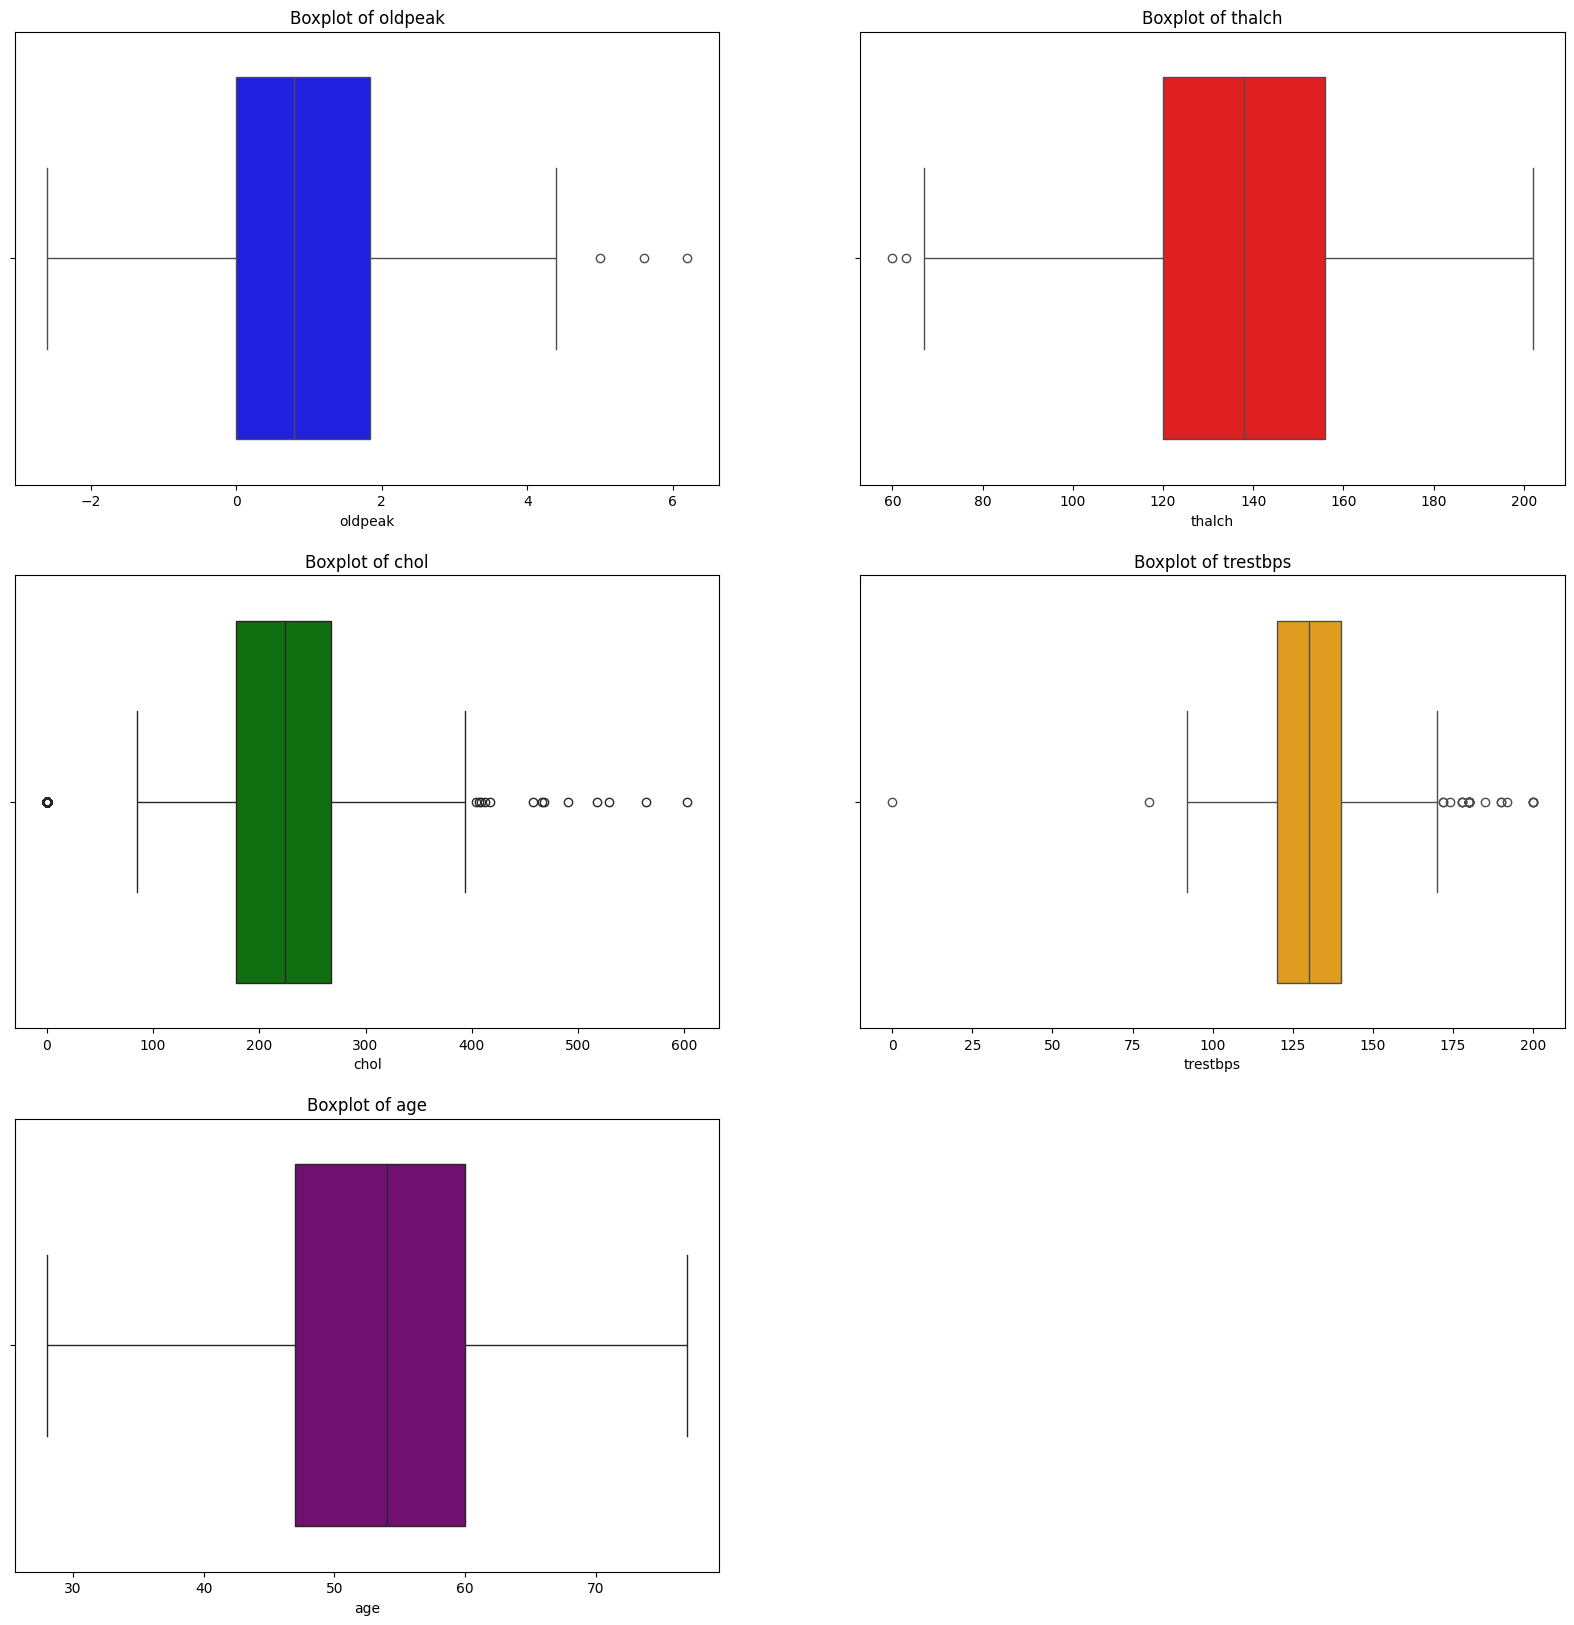

In [600]:
plt.figure(figsize=(20,20))

colors=['blue', 'red', 'green', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3,2, i+1)
    sns.boxplot(x=df[col], color = colors[i])
    plt.title(f'Boxplot of {col}')
plt.show()    

In [601]:
fig = px.box(df, x = ['trestbps'])
fig.show()

In [ ]:
# find the rows where trestbps is 0
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,2.0,reversable defect,3


In [603]:
# drop the rows where trestbps is 0
df = df[df['trestbps'] != 0]

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


## ML model

In [606]:
X = df.drop('num', axis=1)
y = df['num']

In [607]:
# split the data into X and y

X = df.drop('num', axis=1)
y = df['num']

lb_sex = LabelEncoder()
lb_dataset = LabelEncoder()
lb_cp = LabelEncoder()
lb_fbs = LabelEncoder()
lb_restecg = LabelEncoder()
lb_exang = LabelEncoder()
lb_slope = LabelEncoder()
lb_thal = LabelEncoder()

X['sex'] = lb_sex.fit_transform(X['sex'])
X['dataset'] = lb_dataset.fit_transform(X['dataset'])
X['cp'] = lb_cp.fit_transform(X['cp'])
X['fbs'] = lb_fbs.fit_transform(X['fbs'])
X['restecg'] = lb_restecg.fit_transform(X['restecg'])
X['exang'] = lb_exang.fit_transform(X['exang'])
X['slope'] = lb_slope.fit_transform(X['slope'])
X['thal'] = lb_thal.fit_transform(X['thal']) 


In [608]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1


In [609]:
# lb = LabelEncoder()

# for col in X.columns:
#     if X[col].dtype == 'object' or X[col].dtype == 'category':
#         X[col] = lb.fit_transform(X[col])
#     else:
#         pass    

In [610]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1


In [611]:
# train test train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)



In [612]:
X_train.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
456,457,54,1,1,2,120.00,217.0,0,1,137.00,0,0.000,2,0.0,2
797,798,51,1,3,2,132.49,339.0,0,1,123.76,1,3.047,1,2.0,2
25,26,50,0,0,2,120.00,219.0,0,1,158.00,0,1.600,1,0.0,1
84,85,52,1,0,1,120.00,325.0,0,1,172.00,0,0.200,2,0.0,1
10,11,57,1,0,0,140.00,192.0,0,1,148.00,0,0.400,1,0.0,0


Enlist all the model that we will use to pridict the heart disease. These models shpuld be classifiers for multi-class classification

1. KNN
2. Logistic Regression
3. NB
4. SVM
5. Descision Tree
6. Random Forest
7. XGBoost   
8. lightGBM
9. Gradient Boosing 
10. AdaBosst

In [613]:
# import all the model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.pipeline import Pipeline




In [614]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
sys.setrecursionlimit(10000)




# now creating pipeline for ml model

models = {
    'Logistic regression': LogisticRegression(random_state=42),
    'K-Nearest_Neighbor': KNeighborsClassifier(),
    'Naive_Bayes': GaussianNB(),
    'Support_Vector_Machine': SVC(random_state=42),
    'Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random_Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient_Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

best_model = None
best_model_accuracy = 0.0

for name, model in models.items():        # FIXED HERE
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('scaler', StandardScaler()),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    mean_accuracy = scores.mean()

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print("--------------------------------------------------------------")

    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model = pipeline

print("Best Model:", best_model)


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None


Model: Logistic regression
Cross-Validation Accuracy: 0.5184
Test Accuracy: 0.5109
--------------------------------------------------------------


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None


Model: K-Nearest_Neighbor
Cross-Validation Accuracy: 0.5810
Test Accuracy: 0.6033
--------------------------------------------------------------


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,priors,None
,var_smoothing,1e-09


Model: Naive_Bayes
Cross-Validation Accuracy: 0.5810
Test Accuracy: 0.5435
--------------------------------------------------------------


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False


Model: Support_Vector_Machine
Cross-Validation Accuracy: 0.5823
Test Accuracy: 0.5815
--------------------------------------------------------------


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None


Model: Decision_Tree
Cross-Validation Accuracy: 0.6014
Test Accuracy: 0.5924
--------------------------------------------------------------


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'


Model: Random_Forest
Cross-Validation Accuracy: 0.6667
Test Accuracy: 0.6576
--------------------------------------------------------------


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


Model: AdaBoost
Cross-Validation Accuracy: 0.6490
Test Accuracy: 0.6250
--------------------------------------------------------------


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1


Model: Gradient_Boosting
Cross-Validation Accuracy: 0.6490
Test Accuracy: 0.6467
--------------------------------------------------------------


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


Model: XGBoost
Cross-Validation Accuracy: 0.6571
Test Accuracy: 0.6304
--------------------------------------------------------------
Best Model: Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])


Observation:

We evaluated multiple classification models to predict heart disease. Here are the key findings:

* Logistic Regression performed the worst among all models, with a cross-validation accuracy of ~51.8% and test accuracy ~51%.

* K-Nearest Neighbors and Support Vector Machine performed slightly better (~58–60% test accuracy), but still not very strong.

* Decision Tree Classifier gave moderate results with ~59% test accuracy.

* Random Forest Classifier was the best performer, achieving cross-validation accuracy of ~66.7% and test accuracy of ~65.8%, making it the most reliable model for this dataset.

* Ensemble boosting models like AdaBoost (~62.5–64.6% test accuracy), Gradient Boosting, and XGBoost (~63–64% test accuracy) improved performance compared to individual base learners, but none outperformed Random Forest.

Conclusion:
The Random Forest model is the best choice for predicting heart disease in this dataset. It balances bias and variance well, handles feature interactions automatically, and achieves the highest predictive accuracy. Other models either underfit (Logistic Regression) or are less stable on this data (Decision Trees, boosting methods).

In [615]:
# now inverse encoding


X['sex'] = lb_sex.inverse_transform(X['sex'])
X['dataset'] = lb_dataset.inverse_transform(X['dataset'])
X['cp'] = lb_cp.inverse_transform(X['cp'])
X['fbs'] = lb_fbs.inverse_transform(X['fbs'])
X['restecg'] = lb_restecg.inverse_transform(X['restecg'])
X['exang'] = lb_exang.inverse_transform(X['exang'])
X['slope'] = lb_slope.inverse_transform(X['slope'])
X['thal'] = lb_thal.inverse_transform(X['thal']) 

In [616]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
